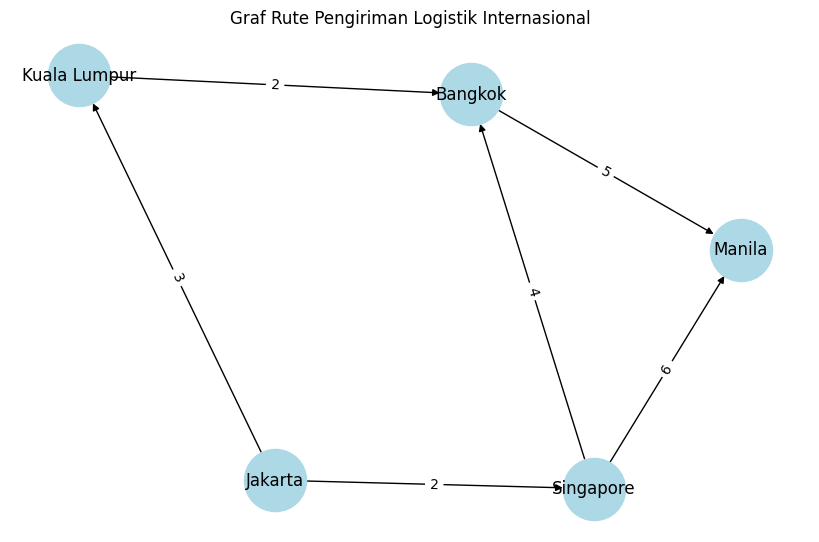

Adjacency List:
Jakarta -> [('Singapore', 2), ('Kuala Lumpur', 3)]
Singapore -> [('Bangkok', 4), ('Manila', 6)]
Kuala Lumpur -> [('Bangkok', 2)]
Bangkok -> [('Manila', 5)]
Manila -> []
Adjacency Matrix:
      Jakarta  Singapore  Kuala Lumpur  Bangkok  Manila
Jakarta   0  2  3  0  0
Singapore 0  0  0  4  6
Kuala Lumpur0  0  0  2  0
Bangkok   0  0  0  0  5
Manila    0  0  0  0  0


In [1]:
# No. 1: Rute Pengiriman Logistik Internasional
# Visualisasi graf berbobot, adjacency list, dan adjacency matrix.

# Visualisasi graf berbobot
import networkx as nx
import matplotlib.pyplot as plt

edges = [
    ('Jakarta', 'Singapore', 2),
    ('Jakarta', 'Kuala Lumpur', 3),
    ('Singapore', 'Bangkok', 4),
    ('Kuala Lumpur', 'Bangkok', 2),
    ('Bangkok', 'Manila', 5),
    ('Singapore', 'Manila', 6)
]

G = nx.DiGraph()
for u, v, w in edges:
    G.add_edge(u, v, weight=w)

pos = nx.spring_layout(G, seed=42)
plt.figure(figsize=(8,5))
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, font_size=12, arrows=True)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title("Graf Rute Pengiriman Logistik Internasional")
plt.show()

# Adjacency List
adj_list = {
    'Jakarta': [('Singapore', 2), ('Kuala Lumpur', 3)],
    'Singapore': [('Bangkok', 4), ('Manila', 6)],
    'Kuala Lumpur': [('Bangkok', 2)],
    'Bangkok': [('Manila', 5)],
    'Manila': []
}
print("Adjacency List:")
for node, neighbors in adj_list.items():
    print(f"{node} -> {neighbors}")

# Adjacency Matrix
nodes = ['Jakarta', 'Singapore', 'Kuala Lumpur', 'Bangkok', 'Manila']
size = len(nodes)
adj_matrix = [[0]*size for _ in range(size)]
for u, v, w in edges:
    i = nodes.index(u)
    j = nodes.index(v)
    adj_matrix[i][j] = w

print("Adjacency Matrix:")
print("      " + "  ".join(nodes))
for i, row in enumerate(adj_matrix):
    print(f"{nodes[i]:<10}{'  '.join(str(x) for x in row)}")

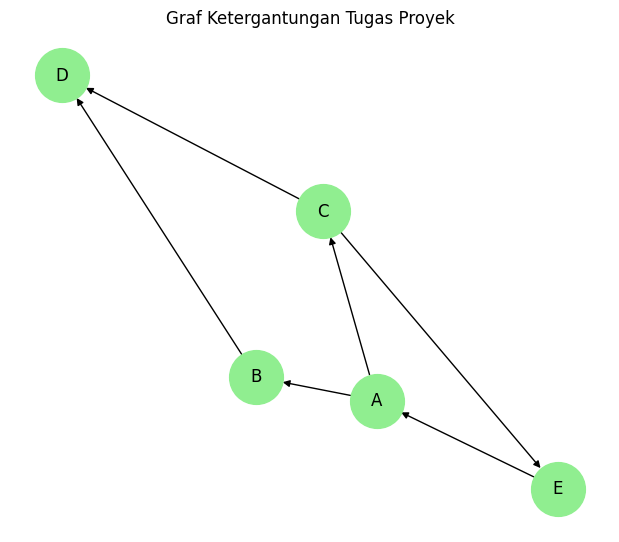

Edge List:
A -> B
A -> C
B -> D
C -> D
C -> E
E -> A
Graf memiliki siklus.


In [2]:
# No. 2: Ketergantungan Tugas Proyek
# Visualisasi graf, edge list, dan deteksi siklus (DFS).

# Visualisasi graf terarah
edges = [
    ('A', 'B'),
    ('A', 'C'),
    ('B', 'D'),
    ('C', 'D'),
    ('C', 'E'),
    ('E', 'A')
]
G = nx.DiGraph()
G.add_edges_from(edges)
pos = nx.spring_layout(G, seed=42)
plt.figure(figsize=(6,5))
nx.draw(G, pos, with_labels=True, node_color='lightgreen', node_size=1500, font_size=12, arrows=True)
plt.title("Graf Ketergantungan Tugas Proyek")
plt.show()

# Edge List
print("Edge List:")
for u, v in edges:
    print(f"{u} -> {v}")

# Deteksi siklus dengan DFS
def dfs(graph, node, visited, rec_stack):
    visited.add(node)
    rec_stack.add(node)
    for neighbor in graph.get(node, []):
        if neighbor not in visited:
            if dfs(graph, neighbor, visited, rec_stack):
                return True
        elif neighbor in rec_stack:
            return True
    rec_stack.remove(node)
    return False

def has_cycle(graph):
    visited = set()
    rec_stack = set()
    for node in graph:
        if node not in visited:
            if dfs(graph, node, visited, rec_stack):
                return True
    return False

graph = {
    'A': ['B', 'C'],
    'B': ['D'],
    'C': ['D', 'E'],
    'D': [],
    'E': ['A']
}
print("Graf memiliki siklus." if has_cycle(graph) else "Graf tidak memiliki siklus.")

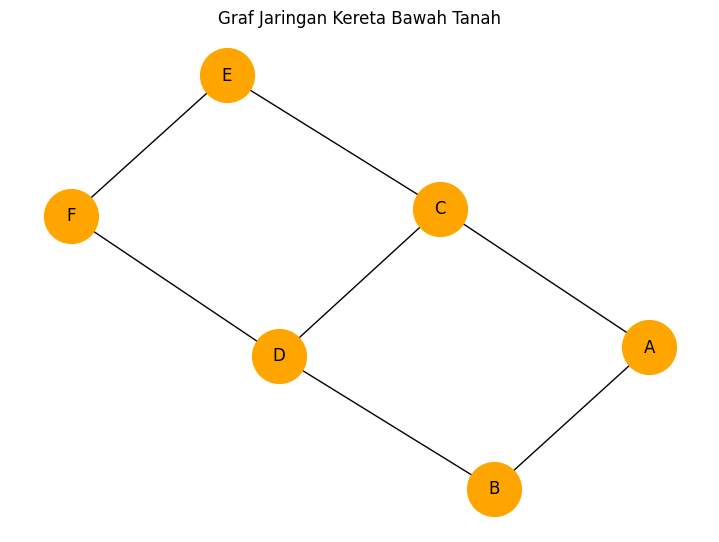

Adjacency List:
A -> ['B', 'C']
B -> ['A', 'D']
C -> ['A', 'D', 'E']
D -> ['B', 'C', 'F']
E -> ['C', 'F']
F -> ['D', 'E']
Rute dari A ke F: ['A', 'B', 'D', 'F']


In [3]:
# No. 3: Jaringan Kereta Bawah Tanah
# Visualisasi graf tak berarah, adjacency list, dan pencarian rute BFS.

import networkx as nx
import matplotlib.pyplot as plt
from collections import deque

# Edge List
edges = [
    ('A', 'B'),
    ('A', 'C'),
    ('B', 'D'),
    ('C', 'D'),
    ('C', 'E'),
    ('D', 'F'),
    ('E', 'F')
]

# Visualisasi graf tak berarah
G = nx.Graph()
G.add_edges_from(edges)
pos = nx.spring_layout(G, seed=42)
plt.figure(figsize=(7,5))
nx.draw(G, pos, with_labels=True, node_color='orange', node_size=1500, font_size=12)
plt.title("Graf Jaringan Kereta Bawah Tanah")
plt.show()

# Adjacency List
adj_list = {
    'A': ['B', 'C'],
    'B': ['A', 'D'],
    'C': ['A', 'D', 'E'],
    'D': ['B', 'C', 'F'],
    'E': ['C', 'F'],
    'F': ['D', 'E']
}
print("Adjacency List:")
for node, neighbors in adj_list.items():
    print(f"{node} -> {neighbors}")

# BFS untuk mencari rute dari A ke F
def bfs(graph, start, goal):
    visited = set()
    queue = deque([[start]])
    while queue:
        path = queue.popleft()
        node = path[-1]
        if node == goal:
            return path
        if node not in visited:
            visited.add(node)
            for neighbor in graph.get(node, []):
                new_path = list(path)
                new_path.append(neighbor)
                queue.append(new_path)
    return None

route = bfs(adj_list, 'A', 'F')
print(f"Rute dari A ke F: {route if route else 'Tidak ditemukan'}")

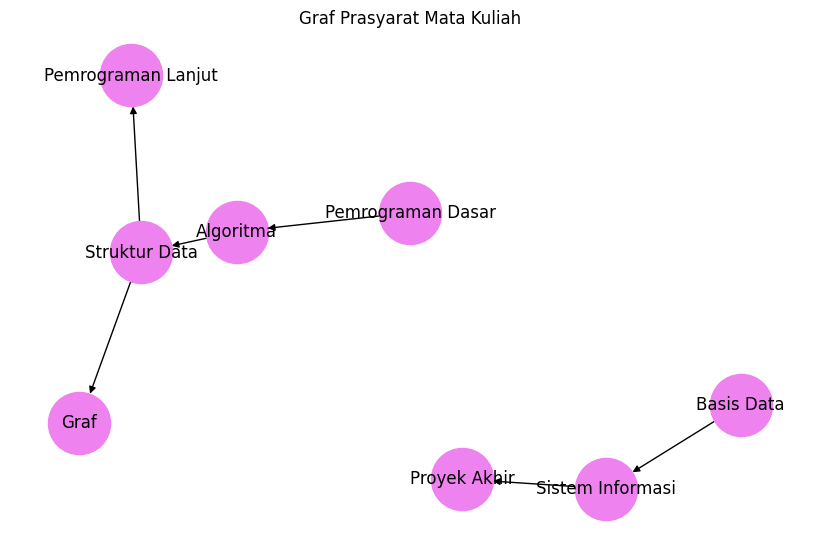

Adjacency List:
Algoritma -> ['Struktur Data']
Struktur Data -> ['Graf', 'Pemrograman Lanjut']
Pemrograman Dasar -> ['Algoritma']
Basis Data -> ['Sistem Informasi']
Sistem Informasi -> ['Proyek Akhir']
Graf -> []
Pemrograman Lanjut -> []
Proyek Akhir -> []


In [4]:
# No.4 : Prasyarat Mata Kuliah
# Visualisasi graf terarah dan adjacency list prasyarat mata kuliah.

import networkx as nx
import matplotlib.pyplot as plt

# Edge List
edges = [
    ('Algoritma', 'Struktur Data'),
    ('Struktur Data', 'Graf'),
    ('Struktur Data', 'Pemrograman Lanjut'),
    ('Pemrograman Dasar', 'Algoritma'),
    ('Basis Data', 'Sistem Informasi'),
    ('Sistem Informasi', 'Proyek Akhir')
]

# Visualisasi graf terarah
G = nx.DiGraph()
G.add_edges_from(edges)
pos = nx.spring_layout(G, seed=42)
plt.figure(figsize=(8,5))
nx.draw(G, pos, with_labels=True, node_color='violet', node_size=2000, font_size=12, arrows=True)
plt.title("Graf Prasyarat Mata Kuliah")
plt.show()

# Adjacency List
adj_list = {
    'Algoritma': ['Struktur Data'],
    'Struktur Data': ['Graf', 'Pemrograman Lanjut'],
    'Pemrograman Dasar': ['Algoritma'],
    'Basis Data': ['Sistem Informasi'],
    'Sistem Informasi': ['Proyek Akhir'],
    'Graf': [],
    'Pemrograman Lanjut': [],
    'Proyek Akhir': []
}
print("Adjacency List:")
for node, neighbors in adj_list.items():
    print(f"{node} -> {neighbors}")